WeatherPY Analysis. 
-As expected it's hotter as one approaches the equator, but this time of year of year it is specifically hotter in the southern hemisphere, oddly enough at the time of this analysis there is a batch of cities between 5 and 15 degrees north of the equator that are the hottest. 
-At the time of this analysis wind speeds were highest in the northern hemisphere,especially approaching the north pole 
-At the time of this analysis cloudiness was relatively evenly distributed across the measured cities, however at about 40 degrees south of the border cloud coverage starts to dissipate, but not until about 70 degrees north of the equator does cloud coverage start to dissipate



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [4]:
cities_df = pd.DataFrame(cities)
# Add columns for lat, lng, cloudiness, country, date, humidity, max temp, wind speed
# Note that we used "" to specify initial entry.

cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""
cities_df.rename(columns = {0:"City"}, inplace=True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grand baie,,,,,,,,
1,rikitea,,,,,,,,
2,sorvag,,,,,,,,
3,kapaa,,,,,,,,
4,stepnyak,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create an empty list to store the responses
#response_json = []

In [6]:
# Make a request for each of the cities
counter_set = 1
record_count = 0
for index, row in cities_df.iterrows():
 
    # add a timer so we don't max out our requests from the API
    # counter tracks the "sets" between pauses
    if (index+1) % 50 == 0:
        record_count = 0
        counter_set += 1
        time.sleep(60)
    try:
        print(f"Processing Record {record_count} of set {counter_set} for City: {cities_df['City'][index]}")
        
        # Get one of the posts

        post_response = requests.get(query_url + cities_df['City'][index]).json()
              
        # pull necessary info from API response      
           
        cities_df.loc[index, "Cloudiness"] = post_response["clouds"]['all']
        cities_df.loc[index, "Country"] = post_response["sys"]['country']
        cities_df.loc[index, "Date"] = post_response["dt"]
        cities_df.loc[index, "Humidity"] = post_response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = post_response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = post_response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = post_response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = post_response["wind"]["speed"]

        
    except KeyError:
        print("city not found") 

    record_count += 1                              

Processing Record 0 of set 1 for City: grand baie
Processing Record 1 of set 1 for City: rikitea
Processing Record 2 of set 1 for City: sorvag
city not found
Processing Record 3 of set 1 for City: kapaa
Processing Record 4 of set 1 for City: stepnyak
Processing Record 5 of set 1 for City: hithadhoo
Processing Record 6 of set 1 for City: vaini
Processing Record 7 of set 1 for City: yanam
Processing Record 8 of set 1 for City: furmanov
Processing Record 9 of set 1 for City: barentsburg
city not found
Processing Record 10 of set 1 for City: chumikan
Processing Record 11 of set 1 for City: kruisfontein
Processing Record 12 of set 1 for City: vercelli
Processing Record 13 of set 1 for City: nemuro
Processing Record 14 of set 1 for City: yellowknife
Processing Record 15 of set 1 for City: busselton
Processing Record 16 of set 1 for City: tongren
Processing Record 17 of set 1 for City: kodiak
Processing Record 18 of set 1 for City: chokurdakh
Processing Record 19 of set 1 for City: ilulissat


Processing Record 14 of set 4 for City: zhigansk
Processing Record 15 of set 4 for City: leningradskiy
Processing Record 16 of set 4 for City: bardiyah
city not found
Processing Record 17 of set 4 for City: ribeira grande
Processing Record 18 of set 4 for City: killybegs
Processing Record 19 of set 4 for City: san jeronimo
Processing Record 20 of set 4 for City: banda aceh
Processing Record 21 of set 4 for City: snyder
Processing Record 22 of set 4 for City: duzce
Processing Record 23 of set 4 for City: clyde river
Processing Record 24 of set 4 for City: sieghartskirchen
Processing Record 25 of set 4 for City: najran
Processing Record 26 of set 4 for City: jiddah
city not found
Processing Record 27 of set 4 for City: hambantota
Processing Record 28 of set 4 for City: sitka
Processing Record 29 of set 4 for City: caravelas
Processing Record 30 of set 4 for City: morondava
Processing Record 31 of set 4 for City: tasiilaq
Processing Record 32 of set 4 for City: kalmar
Processing Record 33

Processing Record 25 of set 7 for City: klyuchi
Processing Record 26 of set 7 for City: umm durman
city not found
Processing Record 27 of set 7 for City: sao gabriel da cachoeira
Processing Record 28 of set 7 for City: sabya
Processing Record 29 of set 7 for City: chase
Processing Record 30 of set 7 for City: andenes
city not found
Processing Record 31 of set 7 for City: ploemeur
Processing Record 32 of set 7 for City: macherla
Processing Record 33 of set 7 for City: karpathos
Processing Record 34 of set 7 for City: trincomalee
Processing Record 35 of set 7 for City: luderitz
Processing Record 36 of set 7 for City: houma
Processing Record 37 of set 7 for City: nenjiang
Processing Record 38 of set 7 for City: saint-augustin
Processing Record 39 of set 7 for City: alyangula
Processing Record 40 of set 7 for City: balkanabat
Processing Record 41 of set 7 for City: rio verde de mato grosso
Processing Record 42 of set 7 for City: tual
Processing Record 43 of set 7 for City: nyrob
Processing

Processing Record 38 of set 10 for City: zverinogolovskoye
Processing Record 39 of set 10 for City: phan thiet
Processing Record 40 of set 10 for City: mnogovershinnyy
Processing Record 41 of set 10 for City: nioro
Processing Record 42 of set 10 for City: lolua
city not found
Processing Record 43 of set 10 for City: severo-kurilsk
Processing Record 44 of set 10 for City: springdale
Processing Record 45 of set 10 for City: srikakulam
Processing Record 46 of set 10 for City: jinchengjiang
city not found
Processing Record 47 of set 10 for City: sinnamary
Processing Record 48 of set 10 for City: cranbourne
Processing Record 49 of set 10 for City: araouane
Processing Record 0 of set 11 for City: iskateley
Processing Record 1 of set 11 for City: khani
Processing Record 2 of set 11 for City: praia
Processing Record 3 of set 11 for City: puerto escondido
Processing Record 4 of set 11 for City: melk
Processing Record 5 of set 11 for City: bustonkala
city not found
Processing Record 6 of set 11 

In [7]:

cities_df.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grand baie,75,MU,1553285340,88,-20.02,57.58,80.6,13.87
1,rikitea,48,PF,1553285450,98,-23.12,-134.97,79.06,17.72
2,sorvag,,,,,,,,
3,kapaa,40,US,1553285293,61,22.08,-159.32,78.8,12.75
4,stepnyak,48,KZ,1553285450,67,52.83,70.79,18.67,3.62
5,hithadhoo,80,MV,1553285450,100,-0.6,73.08,85.45,5.53
6,vaini,0,IN,1553285451,78,15.34,74.49,64.3,1.16
7,yanam,0,IN,1553285451,89,16.73,82.22,77.53,4.18
8,furmanov,90,RU,1553283000,95,57.25,41.11,33.8,8.95
9,barentsburg,,,,,,,,


In [8]:
#remove rows lacking information

final_df = cities_df[(cities_df['Cloudiness'].str.len() != 0)]

In [9]:
#reset index
final_df.reset_index(drop=True,inplace=True)
final_df.to_csv('cities.csv')
final_df.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,grand baie,75,MU,1553285340,88,-20.02,57.58,80.6,13.87
1,rikitea,48,PF,1553285450,98,-23.12,-134.97,79.06,17.72
2,kapaa,40,US,1553285293,61,22.08,-159.32,78.8,12.75
3,stepnyak,48,KZ,1553285450,67,52.83,70.79,18.67,3.62
4,hithadhoo,80,MV,1553285450,100,-0.6,73.08,85.45,5.53
5,vaini,0,IN,1553285451,78,15.34,74.49,64.3,1.16
6,yanam,0,IN,1553285451,89,16.73,82.22,77.53,4.18
7,furmanov,90,RU,1553283000,95,57.25,41.11,33.8,8.95
8,chumikan,0,RU,1553285451,57,54.72,135.31,-6.27,6.64
9,kruisfontein,64,ZA,1553285451,89,-34,24.73,67.09,8.99


In [10]:
# get today's date
date_var = datetime.now()
date_var = date_var.strftime("%m/%d/%Y")
print(date_var)

03/22/2019


/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


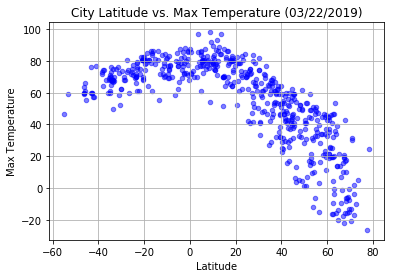

In [11]:
# plot Latitude vs Max Temp
final_df["Lat"] = final_df["Lat"].apply(pd.to_numeric, errors='coerce')
final_df["Max Temp"] = final_df["Max Temp"].apply(pd.to_numeric, errors='coerce')
ax1 = final_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,color="blue",alpha=.5,)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature")
plt.title(f'City Latitude vs. Max Temperature ({date_var})')
plt.savefig('Lat_vs_Maxtemp.png')
plt.show()

#### Latitude vs. Humidity Plot

/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


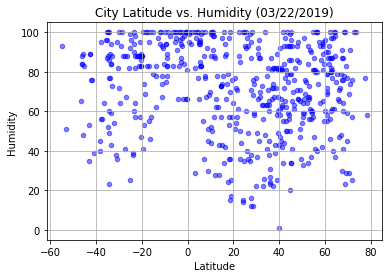

In [12]:
# plot Latitude vs. Humidity
final_df["Lat"] = final_df["Lat"].apply(pd.to_numeric, errors='coerce')
final_df["Humidity"] = final_df["Humidity"].apply(pd.to_numeric, errors='coerce')
ax1 = final_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,color="blue",alpha=.5,)
ax1.set_ylim([-5,105])
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Humidity")
plt.title(f'City Latitude vs. Humidity ({date_var})')
plt.savefig('Lat_vs_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


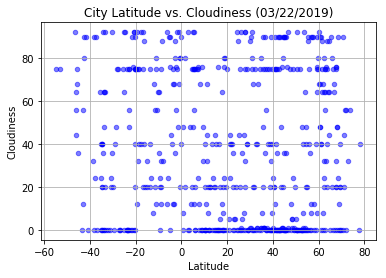

In [13]:
# plot Latitude vs. Cloudiness
final_df["Lat"] = final_df["Lat"].apply(pd.to_numeric, errors='coerce')
final_df["Cloudiness"] = final_df["Cloudiness"].apply(pd.to_numeric, errors='coerce')
ax1 = final_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,color="blue",alpha=.5,)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Cloudiness")
plt.title(f'City Latitude vs. Cloudiness ({date_var})')
plt.savefig('Lat_vs_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python_data/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


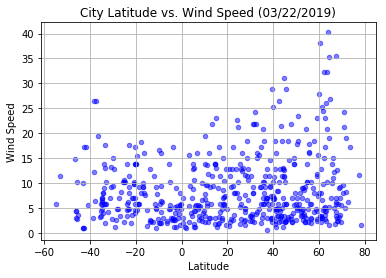

In [14]:
#plot Latitude vs Wind Speed
final_df["Lat"] = final_df["Lat"].apply(pd.to_numeric, errors='coerce')
final_df["Wind Speed"] = final_df["Wind Speed"].apply(pd.to_numeric, errors='coerce')
ax1 = final_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,color="blue",alpha=.5,)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Wind Speed")
plt.title(f'City Latitude vs. Wind Speed ({date_var})')
plt.savefig('Lat_vs_Wind Speed.png')
plt.show()